In [2]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split 
import keras
import tensorflow as tf
from keras.utils.np_utils import to_categorical
from keras import optimizers
from keras.models import Sequential
from keras.layers  import Dense, Activation, Flatten, Dropout, BatchNormalization


In [3]:
random_state=42

In [4]:
data = []
category = []

In [33]:
data_dir="./data"
img_height =img_width =244
batch_size=32

In [91]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 231 files belonging to 2 classes.
Using 185 files for training.


In [92]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 231 files belonging to 2 classes.
Using 46 files for validation.


In [93]:
class_names = train_ds.class_names
print(class_names)

['benign', 'malignant']


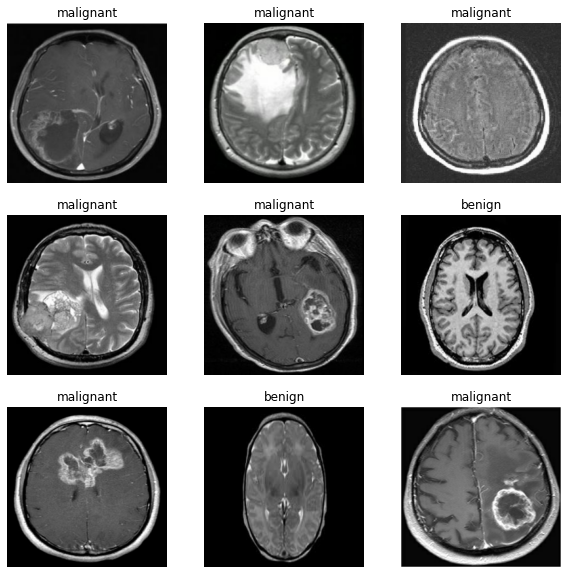

In [94]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [100]:
data_augmentation = tf.keras.Sequential([
  keras.layers.RandomFlip("horizontal_and_vertical"),
  keras.layers.RandomRotation(0.2),
])
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [ ]:
batch_size = 32
AUTOTUNE = tf.data.AUTOTUNE

def prepare(ds, shuffle=False, augment=False):
  ds = ds.map(lambda x, y: (normalization_layer(x), y), 
              num_parallel_calls=AUTOTUNE)

  if shuffle:
    ds = ds.shuffle(1000)

  ds = ds.batch(batch_size)

  if augment:
    ds = ds.map(lambda x, y: (data_augmentation(x, training=True), y), 
                num_parallel_calls=AUTOTUNE)

  return ds.prefetch(buffer_size=AUTOTUNE)

In [97]:
train_ds

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 244, 244, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [98]:
num_classes=2

In [87]:
model=keras.Sequential([
keras.Input(shape=(244,244,3)),
keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
keras.layers.MaxPooling2D(),
keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
keras.layers.MaxPooling2D(),
keras.layers.Flatten(),
keras.layers.Dense(128, activation='relu'),
keras.layers.Dense(num_classes)])

ValueError: Input 0 of layer "max_pooling2d_22" is incompatible with the layer: expected ndim=4, found ndim=5. Full shape received: (None, 1, 244, 244, 16)

In [88]:
model.compile(optimizer='adam',
              loss="binary_crossentropy",
              metrics=['accuracy'])

In [69]:
epochs=5
history = model.fit(
  train_ds,
  validation_data=(val_ds),
  epochs=epochs
)

Epoch 1/5
6/6 [==============================] - 3s 434ms/step - loss: 4.1732 - accuracy: 0.6649 - val_loss: 3.6466 - val_accuracy: 0.7609
Epoch 2/5
6/6 [==============================] - 2s 409ms/step - loss: 5.4403 - accuracy: 0.6432 - val_loss: 3.6466 - val_accuracy: 0.7609
Epoch 3/5
6/6 [==============================] - 2s 407ms/step - loss: 5.4403 - accuracy: 0.6432 - val_loss: 3.6466 - val_accuracy: 0.7609
Epoch 4/5
6/6 [==============================] - 2s 404ms/step - loss: 5.4403 - accuracy: 0.6432 - val_loss: 3.6466 - val_accuracy: 0.7609
Epoch 5/5
6/6 [==============================] - 2s 394ms/step - loss: 5.4403 - accuracy: 0.6432 - val_loss: 3.6466 - val_accuracy: 0.7609
